In [16]:
from IPython.display import display

<center>
<h2 class="title"><b>Administering ArcGIS Enterprise and ArcGIS Online with Python<b/> </h2>



<h3>Andrew Chapkowski</h3>
<h3>Bill Major</h3>

<div>
    <img src="staticimg/esri-logo.png" alt="logo" 
style="width:20%;height:20%;">
</div>


<h3>Esri User Conference, July 2017</h3>
</center>

<center><h2> Presentation Overview </h2></center>

- ArcGIS Enterprise and ArcGIS Online Administration
    - User
    - Groups
    - Content
    - UX/UI
    - Portal Cloning
    - Metadata
    - Managing Credit 
    


<center><h2> Presentation Overview </h2></center>

- Server Administration
    - services
    - folders
    - logs
    - usage

<center><h2>ArcGIS API for Python</h2></center>
- Python API to your Web GIS
- Powerful, modern and easy to use
- Implemented using REST and local capabilities 


<center><h2> What is the Python API for ArcGIS </h2></center>

The ArcGIS API for Python lets ArcGIS Online and ArcGIS Enterprise users, analysts, developers and administrators script and automate tasks ranging from performing big data analysis to content management and administration of their web GIS.
<img src="staticimg/PythonAPIGettingStarted.png" />

**It helps you get things done!**

<center> <h2> Who Uses the ArcGIS API for Python </h2> </center>

<img src="staticimg/WhatIsArcGISPython.PNG"/>

<center> <h2> Connecting to your GIS</h2></center>

- the GIS is either ArcGIS Online or an ArcGIS Portal
- supports **all** authentication methods

<h4> Accessing your Site </h4>

In [ ]:
from arcgis.gis import GIS
gis = GIS(url="https://agsapipor1.esri.com/portal", 
          username="admin",
          password="***************")

In [1]:
from arcgis.gis import GIS
gis = GIS(url="https://agsapipor1.esri.com/portal", 
          username="admin",
          verify_cert=False)


Enter password: ········


<center><h2 class="bigtitle">What can Administrators do?</h2></center>
#### What can we do?
- organization management
- user management
- content Management
- server management


#### Why do this?
- script and automate common tasks
- streamline work process
- make managing systems easier

<h1 class="bigtitle">Diving into Administration</h1>

### Working with Users

- One of the largest tasks on sites
- helps with management tasks
   - creating/deleting
   - managing content
   - assigning roles


In [2]:
users = gis.users

<h3>Getting Your Own Properties</h3>

In [3]:
gis.users.me

<User username:admin>

<h3>Demo: Creating Users from List</h3>

In [ ]:
password = "random1!"

In [5]:
import pandas as pd
df = pd.read_csv(r"data/users.csv")

In [6]:
df.head()

,fname,lname,username,role,email
0,Dena,Mucha,faccount1,org_publisher,Mucha@fakesite.com
1,Darcey,Heart,faccount2,org_admin,Heart@fakesite.com
2,Julius,Eilers,faccount3,org_user,Eilers@fakesite.com
3,Tenisha,Nakamura,faccount4,org_user,Nakamura@fakesite.com
4,Agripina,Croghan,faccount5,org_user,Croghan@fakesite.com


In [21]:
new_users = []
for idx, row in df.iterrows():
    new_users.append(gis.users.create(lastname=row['lname'],
                                      firstname=row['fname'],
                                      username=row['username'],
                                      password=password,
                                      email=row['email'],
                                      role=row['role'])
                    )
    if idx == 4:
        break
print(new_users)

[<User username:faccount1>, <User username:faccount2>, <User username:faccount3>, <User username:faccount4>, <User username:faccount5>]


In [22]:
new_users[1]

<User username:faccount2>

<h4> Updating User Profile Image </h4>

<User username:faccount2>
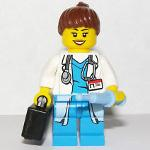

In [23]:
u = new_users[1]
u.update(thumbnail="data/bio_image.jpg")
u

### Working with Groups

- collaborative spaces
- share content

### Creating a Group

In [24]:
uc_group = gis.groups.create(title="UCUserGroup", 
              tags="UC2017", 
              description="Demo Group", 
              snippet=None, 
              access='org', 
              thumbnail=None, 
              is_invitation_only=False, 
              sort_field='avgRating', 
              sort_order='desc', 
              is_view_only=False)

<Group title:"UCUserGroup" owner:ucdemo2017>
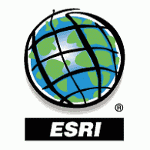

In [25]:
uc_group.update(thumbnail="data/group_logo.gif")
uc_group

#### Adding User to Group

In [26]:
add_users = [u.username for u in new_users]
uc_group.add_users(usernames=add_users)

{'notAdded': []}

In [27]:
uc_group.get_members()

{'admins': ['ucdemo2017'],
 'owner': 'ucdemo2017',
 'users': ['faccount2', 'faccount1', 'faccount4', 'faccount3', 'faccount5']}

## Demo: Cloning a Group

- mimic portal groups from another source

## Working with Content

- manage user data
- delete items
- publish data
- protect data


<center><h3> Demo of Publishing Hosted Feature Service</h3></center>

- Add the Zipped File Geodatabase
- Publish the File Geodatabase
- Change Item's Ownership

In [28]:
items = gis.content.search("World Wide Cities")
if len(items) > 0:
    for item in items:
        item.delete()

<center><h3> Adding an Item </h3></center>

In [29]:
ip = {
    "type" : "File Geodatabase",
    "title" : "World Wide Cities",
    "tags" : "cities"
}
item = gis.content.add(data="data/cities.zip", item_properties=ip)
item   

<Item title:"World Wide Cities" type:File Geodatabase owner:ucdemo2017>

<center><h3> Publishing the Item </h3></center>

In [30]:
published_item = item.publish(file_type="filegeodatabase",
    publish_parameters={"hasStaticData":True,"name":"ucdemotest",
                        "maxRecordCount":2000,
                        "layerInfo":{"capabilities":"Query"}})
published_item

<Item title:"World Wide Cities" type:Feature Layer Collection owner:ucdemo2017>

<center><h3> Changing Ownership </h3></center>

<User username:faccount2>
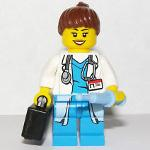

In [31]:
assign_to_user = new_users[1]
assign_to_user

In [32]:
published_item.reassign_to(target_owner=new_users[1].username)

True

<center><h3> Impacts of Changing Ownership </h3></center>

- Published content also moves source data

In [33]:
for item in assign_to_user.items():
    print(item)

<Item title:"World Wide Cities" type:File Geodatabase owner:faccount2>
<Item title:"World Wide Cities" type:Feature Layer Collection owner:faccount2>


<center><h3> Adding Content to Groups </h3></center>

In [34]:
for item in assign_to_user.items():
    item.share(groups=uc_group.id)

In [37]:
for item in assign_to_user.items():
    item.delete()
    del item
for u in new_users:
    u.delete()
    del u
new_users = []
uc_group.delete()

True

### Customizing the User Interface

- Update banner
- Update logo
- Update background



In [38]:
ux = gis.admin.ux

#### Setting a Background
<img src="staticimg/portal_default.png" alt="where1" 
/>

In [39]:
ux.set_background(background_file='staticimg/background.jpg', is_built_in=False)

True


<img src="staticimg/portal_background.png" alt="where2" 
/>


#### Setting a Banner

In [40]:
ux.set_banner(banner_file="staticimg/banner.png", is_built_in=False)

True

<hr/>
<img src="staticimg/portal_banner.png" alt="where2" 
style="width:100%;height:100%;">
<hr/>

### Setting a Logo

In [41]:
ux.set_logo(logo_file="staticimg/logo.jpg")

True

- reset the background to default

In [42]:
ux.set_background(background_file=None, is_built_in=False)

True

- provides methods to use built-in banners

In [43]:
ux.set_banner(banner_file=1, is_built_in=True)

True

## Demo: Clone Portal Users, Groups and Content


<center> <h2> Managing a Site's Metadata </h2> 

<img src="http://desktop.arcgis.com/en/arcmap/latest/manage-data/metadata/GUID-F0B318F9-7338-4369-ACE5-0353DCC48E7F-web.png" 
style="width:40% height:35%"/></center>


<center <h2> Metadata's Importance </h2> </center>
<ul>
  <li>describes data</li>
  <li>helps content consumers</li>
  <li>multiple format support
  <ul>
    <li>fgdc</li>
    <li>inspire</li>
    <li>iso19139</li>
    <li>iso19139-3.2</li>
    <li>iso19115</li>
    <li>arcgis</li>
    </ul>
  </li>
</ul>

#### Enabling Metadata

- can specify metadata format or accept default

In [44]:
metadata = gis.admin.metadata
metadata.enable(metadata_format="iso19115")

True

#### Disable Metadata

In [49]:
metadata.disable()

True

#### Checking if metadata is enabled

In [50]:
print(metadata.is_enabled)
metadata.enable(metadata_format="iso19115")
print(metadata.is_enabled)

False
True


#### Modify the Metadata Format

- allows for changing to formats easily
- supports the same formats as when enabled

In [51]:
metadata.update(metadata_format="arcgis")

True

### Managing Credits

- ArcGIS Online only
- service credits are the currency used across ArcGIS
- import part of administration

#### Enabling/Disable Credits on Organization

<center><img src="staticimg/credits.jpg" alt="credits" 
style="width:50%;height:30%;"></center>

- allows for budgeting strategies
- can either allot a specific amount of credits or given unlimited to users

In [52]:
from arcgis.gis import GIS
import getpass
online = GIS(username=getpass.getpass(), 
             password=getpass.getpass())

········
········


#### Enabling Credit Management

In [53]:
credits = online.admin.credits
credits.enable()

True

#### Assign Credits

In [54]:
credits.allocate(username="ucdemo2017", credits=50)


True

#### Unassign Credit Restriction

In [55]:
credits.deallocate("ucdemo2017")

True

### Working with Enterprise Server

- backbone of analysis and content sharing
- important part of infrastructure 

In [56]:
from arcgis.gis import GIS
gis = GIS("https://python.playground.esri.com/portal",
         username="ucdemo2017")

Enter password: ········


<center> <h3> Accessing Servers </h3> </center>

In [57]:
servers = gis.admin.servers
servers.list()

[<Server at https://python.playground.esri.com/server>,
 <Server at https://python-ga.playground.esri.com/server>,
 <Server at https://python-ra.playground.esri.com/arcgis>]

<center>
<h3 class="title"><b>Finding Servers by Role or Function<b/> </h3>
</center>

- Provides a way to find all servers of a specific function and/or role.
- Allows for the specific search for server use type

In [62]:
analytics_server = servers.get(role="", function="GeoAnalytics")[0]
print(analytics_server)

<Server at https://python-ga.playground.esri.com/server>


In [63]:
hosting_server = servers.get(role="HOSTING_SERVER")[0]
hosting_server

<Server at https://python.playground.esri.com/server>

<center> <h3> Accessing Services </h3> </center>

- Start/stop/delete
- create/delete folders
- edit service JSON


In [64]:
server = servers.list()[0]
services = server.services.list()
services

[<Service at https://python.playground.esri.com/server/admin/services/elevation_270m.ImageServer>,
 <Service at https://python.playground.esri.com/server/admin/services/human_modification_index.ImageServer>,
 <Service at https://python.playground.esri.com/server/admin/services/ImgSrv_Landast_Montana2015.ImageServer>,
 <Service at https://python.playground.esri.com/server/admin/services/SampleWorldCities.MapServer>]

<center> <h3> Managing Service Status </h3> </center>
<lu>
<li>Status provides service state</li>
</lu>

In [65]:
service = services[0]
print(service.status)
print(service.stop())
print(service.status)
print(service.start())
print(service.status)

{'configuredState': 'STARTED', 'realTimeState': 'STARTED'}
True
{'configuredState': 'STOPPED', 'realTimeState': 'STOPPED'}
True
{'configuredState': 'STARTED', 'realTimeState': 'STARTED'}


<center> <h3> Modifying Service Properties </h3> </center>

- adjust publishing properties

In [66]:
ms = services[0]
properties = dict(ms.properties)
for ext in properties['extensions']:
    if ext['typeName'].lower() == "kmlserver":
        ext['enabled'] = 'false'    

In [67]:
ms.edit(properties)

True

<center> <h3> Monitoring Usage </h3> </center>

- helps manage system resources
- find high use servers and services

Usage reports can be accessed using the **list()** operation. 

In [71]:
report = server.usage.list()[0]
report.properties['reportname']

'Total requests for the last 7 days'

In [72]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker

In [73]:
data = report.query()
data_y = data['report']['report-data'][0][0]['data']
data_x = [pd.to_datetime(datetime.fromtimestamp(d//1000)) \
          for d in data['report']['time-slices']]
df = pd.DataFrame(list(zip(data_x, data_y)), columns=["date", "count"])
q = df['count'].isnull() # change NaN values to 0
df.loc[q, 'count'] = 0
df.index = df['date']
df['count'] = df['count'] 

ax = df.plot(kind='bar', x=df['date'])
ticklabels = ['']*len(df.index)
ticklabels[::4] = [item.strftime('%b %d') for item in df.index[::4]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.gcf().autofmt_xdate()

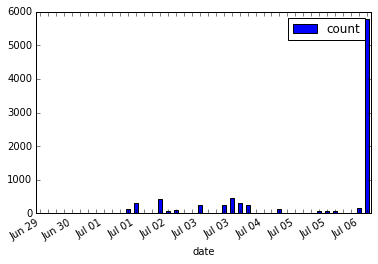

In [74]:
plt.show()

<center> <h3> Working with Log Messages </h3> </center>

- trouble shoot problems
- track issues
- manage log sizes

In [75]:
logs = server.logs
res = logs.query(start_time=None)['logMessages'] # get all messages
df = pd.DataFrame.from_records(res)
df[['code', 'machine', 'message']].head()

,code,machine,message
0,10826,10.0.0.250,ClientCachingAllowed property not found.
1,10825,10.0.0.250,IgnoreCache property not found.
2,10824,10.0.0.250,CacheOnDemand property not found.
3,10823,10.0.0.250,IsCached property not found.
4,10826,10.0.0.250,ClientCachingAllowed property not found.


### Automating Jobs

- Windows/Cron Jobs

<center> <h2> Where to get it? </h2> </center>

<h3>Install in ArcGIS Pro</h3>

<img src="http://esri.github.io/arcgis-python-api/notebooks/nbimages/guide_getstarted_InstallAndSetup_03.PNG" />


<center> <h2> Where to get it? </h2> </center>

<img src="http://esri.github.io/arcgis-python-api/notebooks/nbimages/guide_getstarted_InstallAndSetup_01.PNG"/>


<center> <h2> Helpful Links </h2> </center>

**ArcGIS Python Playground**

https://notebooks.esri.com/

**ArcGIS API for Python Documentation**

https://developers.arcgis.com/python/

**Docker Image Download Location**

https://hub.docker.com/r/esridocker/arcgis-api-python-notebook/


# Questions?

<img src="staticimg/SurveySlide.PNG" alt="where"/>

<img src="staticimg/LastSlide.PNG" alt="where"/>